# **Regressão**

In [1]:
# Importando pacotes
import numpy as np
import matplotlib.pyplot as plt

A regressão linear é uma técnica usada para modelar a relação entre uma variável dependente contínua $y$ e uma ou mais variáveis independentes $X$. O modelo assume que $y$ pode ser descrito como uma combinação linear das variáveis independentes:

$$
    y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon,
$$

onde:
* $\beta_0$ é o intercepto do modelo;
* $\beta_1, \beta_2, \ldots, \beta_n$ são os coeficientes que determinam a contribuição de cada variável independente $x_i$;
* $\epsilon$ é o termo de erro, que captura as variações não explicadas pelo modelo.

A regressão linear é usada principalmente para prever valores contínuos, como preços de casas ou temperaturas.


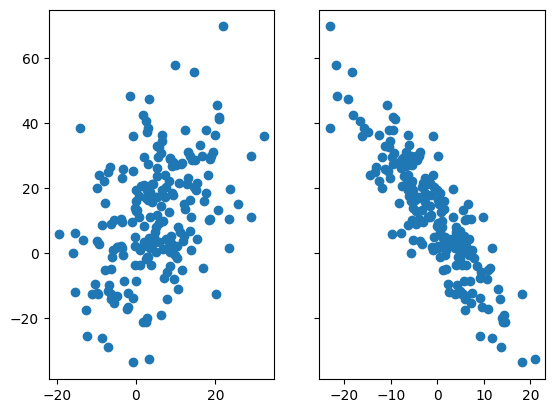

In [2]:
# Gerando as variáveis explicativas X_1  e X_2
X_1 = np.random.normal(6, 10, 200)
X_2 = np.random.normal(0, 8, 200)

# Gerando a variável explicada y
y = 5 + 0.9 * X_1 - 2 * X_2 + np.random.normal(0, 1, 200)

# Concatenando X_1 e X_2 em uma matrix
X = np.column_stack((X_1, X_2))

# Plotando as relações entre y e X_1, e y e X_2
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X_1, y)
ax2.scatter(X_2, y)

In [3]:
# Função auxiliar para adicionar a constante
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

A função de perda para a regressão por mínimos quadrados mede a soma dos erros quadrados entre os valores previstos $\hat{y}$ e os valores reais $y$:

$$
    L(\beta) = \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 = \sum_{i=1}^n \left( y_i - \left( \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} \right) \right)^2.
$$


In [4]:
# Regressão Linear por Mínimos Quadrados
def linear_regression(X, y):
    X = add_bias(X)  # Adiciona o termo de viés (intercepto)
    weights = np.linalg.inv(X.T @ X) @ X.T @ y
    return weights

beta = linear_regression(X, y)
print("y = ", beta[0], " + ", beta[1], "x_1 + ", beta[2], "x_2")

y =  4.980981163801385  +  0.9012723184454349 x_1 +  -2.005268868906874 x_2


A função de perda para a regressão Ridge adiciona um termo de regularização à perda de mínimos quadrados. Este termo penaliza grandes valores dos coeficientes $\beta$ para reduzir o overfitting:

$$
    L(\beta) = \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^p \beta_j^2,
$$

In [5]:
# Regressão Ridge
def ridge_regression(X, y, alpha):
    X = add_bias(X)
    I = np.eye(X.shape[1])
    I[0, 0] = 0  # Não regulariza o termo de bias
    weights = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
    return weights

beta = ridge_regression(X, y, 10e4)
print("y = ", beta[0], " + ", beta[1], "x_1 + ", beta[2], "x_2")

y =  10.594342020487902  +  0.12009187064803525 x_1 +  -0.22928397093431782 x_2


A regressão logística, por outro lado, é usada quando a variável dependente $y$ é categórica, frequentemente representando dois estados, como "sucesso" ou "falha" (isto é, problemas de classificação binária). A fórmula básica do modelo é dada pela função sigmoide:

$$
    P(y=1|X) = \frac{1}{1 + e^{-z}},
$$

onde $z$ é uma combinação linear das variáveis independentes:

$$
    z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n.
$$

A saída do modelo é uma probabilidade $P(y=1|X)$, que pode ser interpretada como a confiança do modelo de que $y$ pertence à classe 1.

A função de perda para a regressão logística é baseada na verossimilhança, usando a entropia cruzada para medir a discrepância entre as probabilidades previstas $\hat{y}$ e as classes reais $y$:

$$
    L(\beta) = -\sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right],
$$


In [6]:
# Regressão Logística

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, iterations=1000, lr=0.01):
    X = add_bias(X)
    weights = np.zeros(X.shape[1])
    for _ in range(iterations):
        pred = sigmoid(X @ weights)
        gradient = X.T @ (pred - y) / len(y)
        weights -= lr * gradient
    return weights

y_2 = sigmoid(y)

beta = logistic_regression(X, y_2)
print("y = ", beta[0], " + ", beta[1], "x_1 + ", beta[2], "x_2")

y =  0.7946425370754961  +  0.3206391474820672 x_1 +  -0.6297419042628264 x_2
